In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
sns.set()

In [ ]:
data = pd.read_csv("data.csv", sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10243 non-null  int64  
 1   INCOME_BASE_TYPE       10157 non-null  object 
 2   CREDIT_PURPOSE         10243 non-null  object 
 3   INSURANCE_FLAG         10242 non-null  float64
 4   DTI                    10097 non-null  object 
 5   SEX                    10243 non-null  object 
 6   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 7   DEPENDANT_NUMBER       10243 non-null  int64  
 8   EDUCATION              10243 non-null  object 
 9   EMPL_TYPE              10233 non-null  object 
 10  EMPL_SIZE              10098 non-null  object 
 11  BANKACCOUNT_FLAG       7890 non-null   float64
 12  Period_at_work         7888 non-null   float64
 13  age                    7890 non-null   float64
 14  EMPL_PROPERTY          7890 non-null   object 
 15  EM

In [ ]:
data['DTI'] = data['DTI'].replace(['#ПОЛЕ!'], np.nan)
data['DTI'] = data['DTI'].replace(['nan'], np.nan)
data['DTI'] = pd.to_numeric(data['DTI'])

The data consists out of 10243 entries with 44 columns. The first column "variant" can be dropped due to it being non-relevant to the data.

We have 33 numerical fields and 10 non-numerical ones.

In [ ]:
data_numeric = data.select_dtypes(np.number)

In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10243 non-null  int64  
 1   INSURANCE_FLAG         10242 non-null  float64
 2   DTI                    10095 non-null  float64
 3   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 4   DEPENDANT_NUMBER       10243 non-null  int64  
 5   BANKACCOUNT_FLAG       7890 non-null   float64
 6   Period_at_work         7888 non-null   float64
 7   age                    7890 non-null   float64
 8   max90days              3893 non-null   float64
 9   max60days              3893 non-null   float64
 10  max30days              3893 non-null   float64
 11  max21days              3893 non-null   float64
 12  max14days              3893 non-null   float64
 13  avg_num_delay          3601 non-null   float64
 14  if_zalog               3616 non-null   float64
 15  nu

Then we'll remove all categorical data encoded as numeric (like BANK_ACCOUNT_FLAG, which is 0 for not having online account, 1 - has online account, 2+ - accessed the online account from another device).

In [ ]:
data_quantitative = data_numeric[['DTI','FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'Period_at_work', 'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan']]

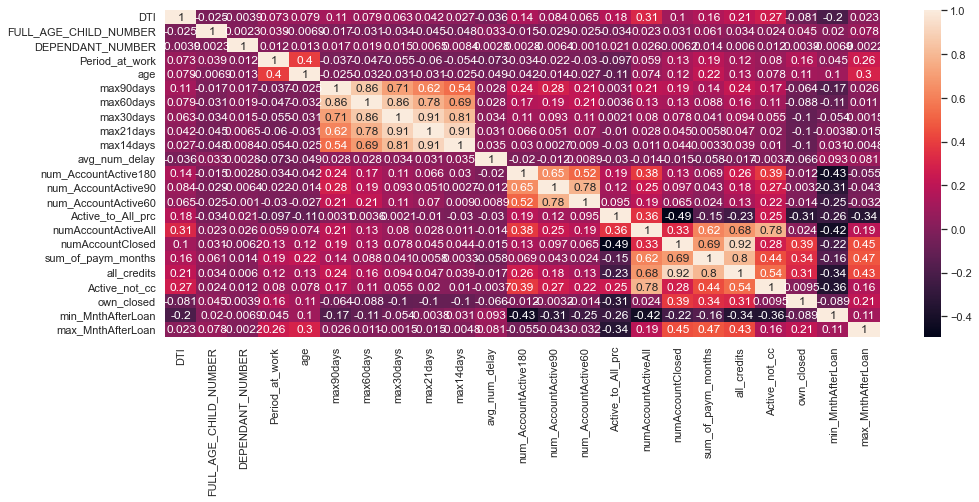

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data_quantitative.corr(), annot=True)
plt.show()

It can be noticed that most values are positive and close to 0. There are some correlations that are pretty close to 1, but not many. Modulo of negative correlation is at most 0.49 which is a noticeable but not strong correlation.

However, high positive correlation arises mostly due to not having some pattern, but due to containing arithmetically dependant data (max21days and max30days have correlation of 0.91 as last 30 days includes last 21 days)

The same can be said about high negative correlation - Active_to_all_prc and numAccountClosed have correlation of -0.49 which can be exaplained arithmetically - the more accounts are closed, the less the relation of number of active accounts to all accounts.

However, this matrix only considers quantitative data, not taking into account categorical data.

ID was not considered in this matrix as it contains unique value for each row and does not have high correlation to any other column.

For categorical values it's better to consider number of nulls, mode, etc

In [ ]:
data_info = pd.DataFrame(columns = data.columns, index=["Unique #", "Unique %", "Nulls #", "Nulls %", "Mean", "Median", "Stddev", "Min", "Max", "Mode", "Type"])
for col in data.columns:
    for metric_name, metric in [
        ("Unique #", lambda c: c.drop_duplicates().shape[0]),
        ("Unique %", lambda c: c.drop_duplicates().shape[0] / c.shape[0]),
        ("Nulls #", lambda c: c.shape[0] - c.dropna().shape[0]),
        ("Nulls %", lambda c: 1 - c.dropna().shape[0] / c.shape[0]),
        ("Mean", np.mean),
        ("Median", np.median),
        ("Stddev", np.std),
        ("Min", np.min),
        ("Max", np.max),
        ("Mode", lambda c: c.mode()[0]),
        ("Type", lambda c: c.dtype),
        ]:
            try:
                data_info.loc[metric_name, col] = metric(data[col])
            except:
                pass
data_stats = data_info.transpose()

In [ ]:
data_stats

,Unique #,Unique %,Nulls #,Nulls %,Mean,Median,Stddev,Min,Max,Mode,Type
ID,10243,1.0,0,0.0,1102426.0,1102426.0,59137.987791,1000006,1204846,1000006,int64
INCOME_BASE_TYPE,5,0.000488,86,0.008396,NaN,NaN,NaN,NaN,NaN,2НДФЛ,object
CREDIT_PURPOSE,10,0.000976,0,0.0,NaN,NaN,NaN,Другое,Ремонт,Ремонт,object
INSURANCE_FLAG,3,0.000293,1,0.000098,0.601445,NaN,0.489601,0.0,1.0,1.0,float64
DTI,59,0.00576,148,0.014449,0.384428,NaN,0.137952,0.02,0.59,0.59,float64
SEX,2,0.000195,0,0.0,NaN,NaN,NaN,женский,мужской,мужской,object
FULL_AGE_CHILD_NUMBER,6,0.000586,0,0.0,0.562433,0.0,0.771378,0,5,0,int64
DEPENDANT_NUMBER,5,0.000488,0,0.0,0.003905,0.0,0.082575,0,4,0,int64
EDUCATION,9,0.000879,0,0.0,NaN,NaN,NaN,*n.a.*,ученая степень,высшее,object
EMPL_TYPE,10,0.000976,10,0.000976,NaN,NaN,NaN,NaN,NaN,специалист,object


We have only unique values of ID and the total number of entries is 10243.

We have quite high percentages of nulls (up to 64%).

In some fields that are quantitative there are not many unique values (own_closed - number of closed accounts - takes only 9 unique values).

Let's clear the database a little so it can be then user for clusterization. (delete some values, add modes or means instead of missing values, etc)

**ID** is unique for every row, so it can be removed from the table, however not deleted completely as it contains clients' IDs which are to be used later.

In [ ]:
data['INCOME_BASE_TYPE'].unique()

array(['Поступление зарплаты на счет', '2НДФЛ',
       'Форма банка (без печати работодателя)',
       'Свободная форма с печатью работодателя', nan], dtype=object)


**INCOME BASE TYPE** takes 5 unique values, including nan, when missed

In [ ]:
data['CREDIT_PURPOSE'].unique()

array(['Ремонт', 'Отпуск', 'Покупка недвижимости/ строительство',
       'Покупка земли', 'Покупка автомобиля', 'Другое', 'Покупка мебели',
       'Покупка бытовой техники', 'Обучение', 'Лечение'], dtype=object)

**CREDIT PURPOSE** takes 10 unique values without nans.

In [ ]:
data['INSURANCE_FLAG'].unique()

array([ 1.,  0., nan])

**INSURANCE FLAG** is a boolean categorical variable with nans.

In [ ]:
data["SEX"].unique()

array(['женский', 'мужской'], dtype=object)

**INSURANCE FLAG** is a boolean categorical variable without nans.

In [ ]:
data["EDUCATION"].unique()

array(['высшее', 'Высшее/Второе высшее/Ученая степень',
       'среднее-специальное', 'второе высшее', 'незаконченное высшее',
       'среднее', '*n.a.*', 'ученая степень', 'Неполное среднее'],
      dtype=object)

**EDIUCATION** contains 9 unique values including * n.a.* which is to be replaced with nan.

In [ ]:
data["EMPL_TYPE"].unique()

array(['менеджер среднего звена', 'специалист',
       'вспомогательный персонал', 'рабочий', 'менеджер высшего звена',
       'торговый представитель', 'другое', 'менеджер по продажам', nan,
       'страховой агент'], dtype=object)

**EMPL_TYPE** contains 10 uniques values with nans.

In [ ]:
data["EMPL_SIZE"].unique()

array(['>250', '< 50', '>=50', nan, '>=100', '>100', '>=200', '>=150',
       '*n.a.*'], dtype=object)

**EMPL_SIZE** contains 9 unique values. However, * n.a.* does not give any info, so it is to be replaced with nan. In addition, >=100 and >100 are very similar categories, so they are to be merged in one (let it be >= 100).

In [ ]:
data["BANKACCOUNT_FLAG"].unique()

array([ 0.,  3.,  1., nan,  4.,  2.])

**BANKACCOUNT_FLAG** contains 6 uniques values including nan. However, according to data description, all values more or equal to 2 mean the same "accessed the online account from another device". So, 3, 4 are to be transformed into 2. It should be noticed that number of nans is quite large - 2353

In [ ]:
data["EMPL_PROPERTY"].unique()

array(['Другое', 'Торговля', 'Транспорт', 'Информационные технологии',
       'Наука', 'Финансы', nan, 'Строительство', 'Производство',
       'Государственная служба', 'Туризм', 'Сельское и лесное хозяйство',
       'Юридические услуги'], dtype=object)

**EMPL_PROPERTY** contains 13 unique values including nan. It should be noticed that number of nans is quite large - 2353

In [ ]:
data["EMPL_FORM"].unique()

array(['Иная форма', 'ЗАО', 'ООО', nan, 'Государственное предприятие',
       'ОАО', 'Индивидуальный предприниматель'], dtype=object)

In [ ]:
data["FAMILY_STATUS"].unique()

array(['женат / замужем', 'холост / не замужем', nan, 'повторный брак',
       'разведен / разведена', 'гражданский брак', 'вдовец / вдова'],
      dtype=object)

Both **EMPL_FORM** and **FAMILY_STATUS** contain 7 unique values with nans. It should be noticed that the number of nans is large in both - 6290

In [ ]:
data[data['EMPL_FORM'].notna()]['FAMILY_STATUS'].unique()

array(['женат / замужем', 'холост / не замужем', 'повторный брак',
       'разведен / разведена', 'гражданский брак', 'вдовец / вдова'],
      dtype=object)

The missing values in **EMPL_FORM** and **FAMILY_STATUS** are situated in the same rows along with missing values in 18 quantitative columns.

In [ ]:
data["if_zalog"].unique()

array([ 1.,  0., nan])

In [ ]:
data["dlq_exist"].unique()

array([ 0., nan,  1.])

In [ ]:
data["thirty_in_a_year"].unique()

array([ 0., nan,  1.])

In [ ]:
data["sixty_in_a_year"].unique()

array([ 0., nan,  1.])

In [ ]:
data["ninety_in_a_year"].unique()

array([ 0., nan,  1.])

In [ ]:
data["thirty_vintage"].unique()

array([ 0., nan,  1.])

In [ ]:
data["sixty_vintage"].unique()

array([ 0., nan,  1.])

In [ ]:
data["ninety_vintage"].unique()

array([ 0., nan,  1.])

**if_zalog**, **dlq_exist**, **thirty_in_a_year**, **sizty_in_a_year**, **ninety_in_a_year**, **thirty_vintage**, **sizty_vintage**, **ninety_vintage** are all binomial categorical variables with nans. There are 6627 nans in each column. Moreover, these nans are situated in the same rows, where 18 quantitative variables have nans and above-mentioned  **EMPL_FORM** and **FAMILY_STATUS** also have nans.

All these 6627 rows with missing values should be deleted, as they have a lot of data missing along with being categorical variables, which restoration can actually make the data worse.

Let's edit the data according to the decisions made during analysis of each variable and then remove these rows and move on to quatitative variables.

- Replace * n.a* with nan in **EDUCATION**
- Replace * n.a* with nan in **EMPL_SIZE**
- Replace >100 with >= 100 in **EMPL_SIZE**
- Replace 3 and 4 with 2 in **BANKACCOUNT_FLAG**

In [ ]:
data['EDUCATION'] = data['EDUCATION'].replace(["*n.a.*"], np.nan)

In [ ]:
data['EMPL_SIZE'] = data['EMPL_SIZE'].replace(["*n.a.*"], np.nan)

In [ ]:
data['EMPL_SIZE'] = data['EMPL_SIZE'].replace([">100"], ">=100")

In [ ]:
data['BANKACCOUNT_FLAG'] = data['BANKACCOUNT_FLAG'].replace([4], 2)
data['BANKACCOUNT_FLAG'] = data['BANKACCOUNT_FLAG'].replace([3], 2)

In [ ]:
data_removed = data[data['if_zalog'].notna()]

In [ ]:
data_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 0 to 10242
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3616 non-null   int64  
 1   INCOME_BASE_TYPE       3616 non-null   object 
 2   CREDIT_PURPOSE         3616 non-null   object 
 3   INSURANCE_FLAG         3616 non-null   float64
 4   DTI                    3615 non-null   float64
 5   SEX                    3616 non-null   object 
 6   FULL_AGE_CHILD_NUMBER  3616 non-null   int64  
 7   DEPENDANT_NUMBER       3616 non-null   int64  
 8   EDUCATION              3601 non-null   object 
 9   EMPL_TYPE              3616 non-null   object 
 10  EMPL_SIZE              3613 non-null   object 
 11  BANKACCOUNT_FLAG       3616 non-null   float64
 12  Period_at_work         3616 non-null   float64
 13  age                    3616 non-null   float64
 14  EMPL_PROPERTY          3616 non-null   object 
 15  EMP

Now, we can see that we still have a few missing values in **DTI**, **max90days**, **max60days**, **max30days**, **max21days**, **max14days** and **avg_num_delay** which are all quatitative fields. We can replace nans with mean value of the column.

In [ ]:
data_removed = data_removed.fillna(data_removed.mean())

<ipython-input-38-0fc2586cf1bf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_removed = data_removed.fillna(data_removed.mean())


In [ ]:
data_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 0 to 10242
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3616 non-null   int64  
 1   INCOME_BASE_TYPE       3616 non-null   object 
 2   CREDIT_PURPOSE         3616 non-null   object 
 3   INSURANCE_FLAG         3616 non-null   float64
 4   DTI                    3616 non-null   float64
 5   SEX                    3616 non-null   object 
 6   FULL_AGE_CHILD_NUMBER  3616 non-null   int64  
 7   DEPENDANT_NUMBER       3616 non-null   int64  
 8   EDUCATION              3601 non-null   object 
 9   EMPL_TYPE              3616 non-null   object 
 10  EMPL_SIZE              3613 non-null   object 
 11  BANKACCOUNT_FLAG       3616 non-null   float64
 12  Period_at_work         3616 non-null   float64
 13  age                    3616 non-null   float64
 14  EMPL_PROPERTY          3616 non-null   object 
 15  EMP

We still have some missing values in **EDUCATION** and **EMPL_SIZE**, which are categorical variables. Due to having not much missing values we can either replace the values with modes of corresponding columns or delete the rows. We will replace the values with modes.

In [ ]:
data_removed['EDUCATION'] = data_removed["EDUCATION"].fillna(data_removed["EDUCATION"].mode()[0])

In [ ]:
data_removed['EMPL_SIZE'] = data_removed["EMPL_SIZE"].fillna(data_removed["EMPL_SIZE"].mode()[0])

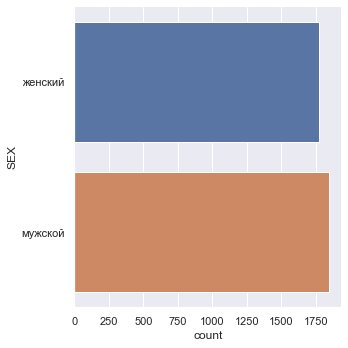

In [ ]:
sns.catplot(data=data_removed, y="SEX", kind="count" )

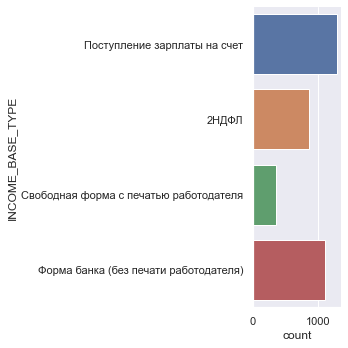

In [ ]:
sns.catplot(data=data_removed, y="INCOME_BASE_TYPE", kind="count" )

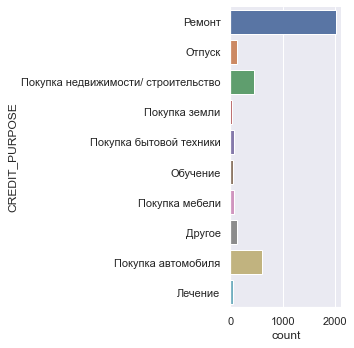

In [ ]:
sns.catplot(data=data_removed, y="CREDIT_PURPOSE", kind="count" )

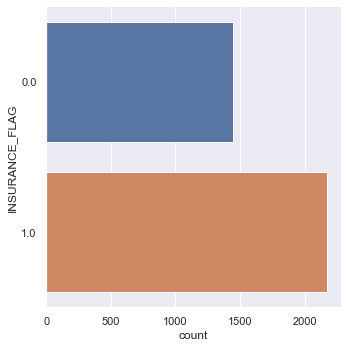

In [ ]:
sns.catplot(data=data_removed, y="INSURANCE_FLAG", kind="count" )

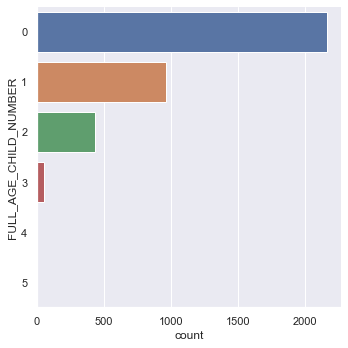

In [ ]:
sns.catplot(data=data_removed, y="FULL_AGE_CHILD_NUMBER", kind="count" )

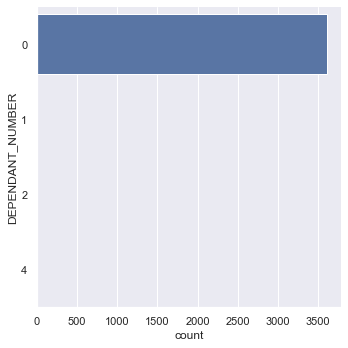

In [ ]:
sns.catplot(data=data_removed, y="DEPENDANT_NUMBER", kind="count" )

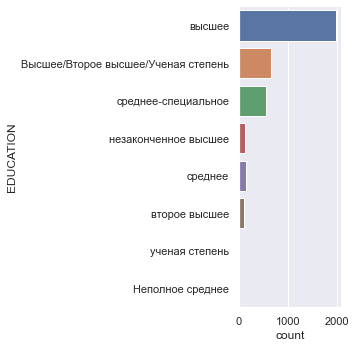

In [ ]:
sns.catplot(data=data_removed, y="EDUCATION", kind="count" )

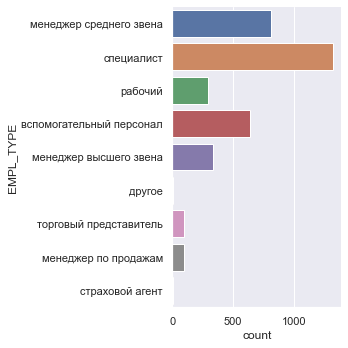

In [ ]:
sns.catplot(data=data_removed, y="EMPL_TYPE", kind="count" )

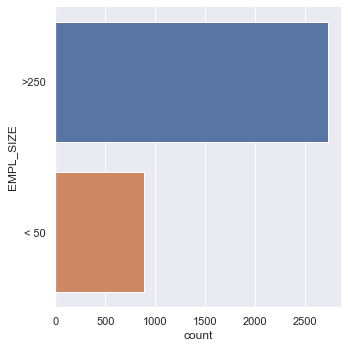

In [ ]:
sns.catplot(data=data_removed, y="EMPL_SIZE", kind="count" )

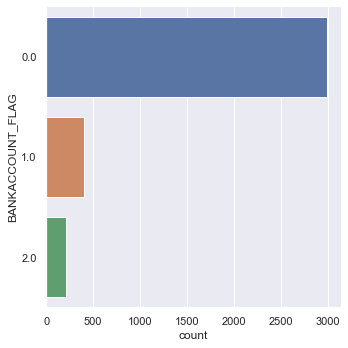

In [ ]:
sns.catplot(data=data_removed, y="BANKACCOUNT_FLAG", kind="count" )

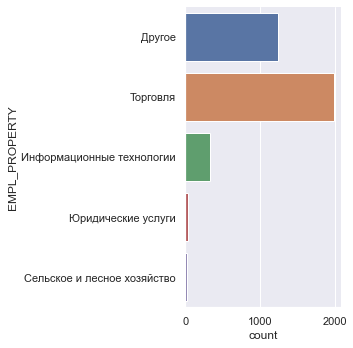

In [ ]:
sns.catplot(data=data_removed, y="EMPL_PROPERTY", kind="count" )

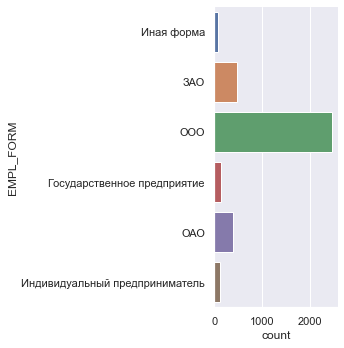

In [ ]:
sns.catplot(data=data_removed, y="EMPL_FORM", kind="count" )

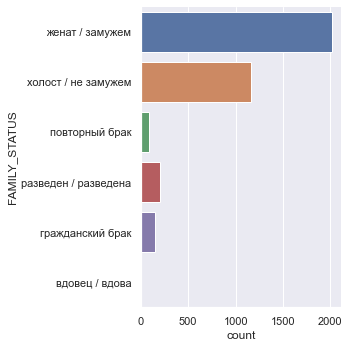

In [ ]:
sns.catplot(data=data_removed, y="FAMILY_STATUS", kind="count" )

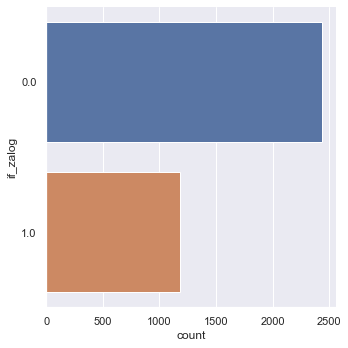

In [ ]:
sns.catplot(data=data_removed, y="if_zalog", kind="count" )

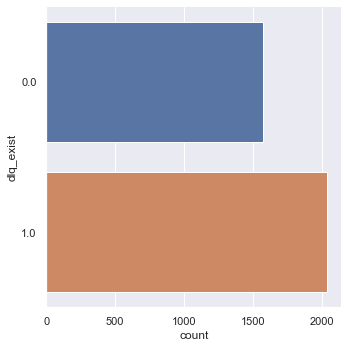

In [ ]:
sns.catplot(data=data_removed, y="dlq_exist", kind="count" )

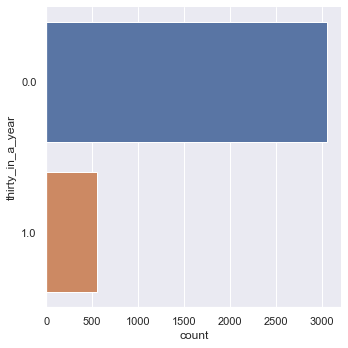

In [ ]:
sns.catplot(data=data_removed, y="thirty_in_a_year", kind="count" )

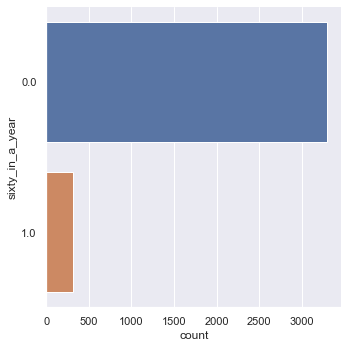

In [ ]:
sns.catplot(data=data_removed, y="sixty_in_a_year", kind="count" )

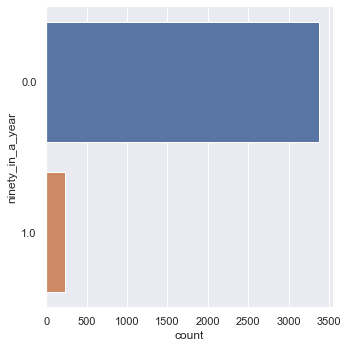

In [ ]:
sns.catplot(data=data_removed, y="ninety_in_a_year", kind="count" )

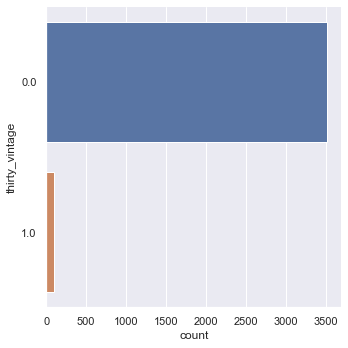

In [ ]:
sns.catplot(data=data_removed, y="thirty_vintage", kind="count" )

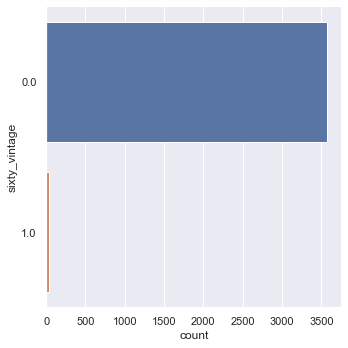

In [ ]:
sns.catplot(data=data_removed, y="sixty_vintage", kind="count" )

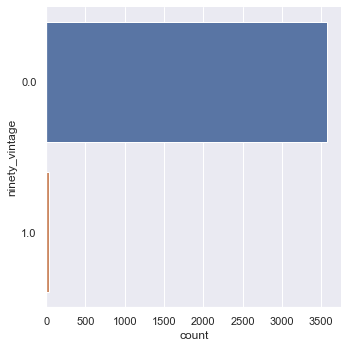

In [ ]:
sns.catplot(data=data_removed, y="ninety_vintage", kind="count" )

**thirty_in_a_year**, **sixty_in_a_year**, **ninety_in_a_year**, are all similarly distribited as they display the same thing over different periods of time (one period is inside of another).

The same situation is with **vintage**s and **max(n)days**.

In [ ]:
data_removed.mean()

<ipython-input-63-ce973284ab9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_removed.mean()


ID                       1.097706e+06
INSURANCE_FLAG           6.012168e-01
DTI                      3.878036e-01
FULL_AGE_CHILD_NUMBER    5.564159e-01
DEPENDANT_NUMBER         3.318584e-03
BANKACCOUNT_FLAG         2.328540e-01
Period_at_work           5.657605e+01
age                      3.587832e+01
max90days                1.604097e+00
max60days                1.108804e+00
max30days                7.904208e-01
max21days                5.802879e-01
max14days                4.692691e-01
avg_num_delay            6.290436e-02
if_zalog                 3.266040e-01
num_AccountActive180     3.694690e-01
num_AccountActive90      1.518252e-01
num_AccountActive60      9.209071e-02
Active_to_All_prc        4.281611e-01
numAccountActiveAll      2.221792e+00
numAccountClosed         3.497235e+00
sum_of_paym_months       8.065183e+01
all_credits              5.719027e+00
Active_not_cc            1.084071e+00
own_closed               7.270465e-01
min_MnthAfterLoan        1.411947e+01
max_MnthAfte

The average client according to modes for categorical and means for quatitative variables is:

- Male of about 36 years old
- Married
- doesn't have children
- doesn't have dependants
- doesn't have "zalog"
- gets salary on account
- has higher education
- has insurance
- takes credit for repairment
- works in sales
- earns >250
- works as a specialist
- works in "OOO"

Now we need to encode the categorical data into numeric.

Among all, only one can be treated as ordinal - EDUCATION.

We'll encode it the following way:

1 - "Неполное среднее"

2 - "среднее"

3 - "среднее-специальное"

4 - "незаконченное высшее"

5 - "высшее"

6 - "второе высшее"

7 - "ученая степень"

"Высшее/Второе высшее/Ученая степень" will be encoded as 6 which is mean of all values present in category.

In [ ]:
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['высшее'], 5)
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['Высшее/Второе высшее/Ученая степень'], 6)
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['среднее-специальное'], 3)
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['второе высшее'], 6)
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['незаконченное высшее'], 4)
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['среднее'], 2)
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['ученая степень'], 7)
data_removed['EDUCATION'] = data_removed['EDUCATION'].replace(['Неполное среднее'], 1)

Others will be encoded as dummy variables.

In [ ]:
data_encoded = pd.get_dummies(data_removed)
data_encoded_copy = data_encoded.copy()
labels = data_encoded.columns

# part 2

# KMEans

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data_encoded = data_encoded.drop(columns=['ID'])

In [ ]:
scaler = StandardScaler()

In [ ]:
data_encoded = scaler.fit_transform(data_encoded.to_numpy())

(Normalize data)

Then, use PCA to get low dimentional data without loss of much information

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pcan = PCA(n_components=2)

In [ ]:
pca_res = pcan.fit_transform(data_encoded)

In [ ]:
pca_res

array([[-2.67771892, -1.34486475],
       [-1.65007994,  3.21004052],
       [-1.00225064,  2.82351465],
       ...,
       [ 3.51169192, -3.97593443],
       [-2.5399888 ,  0.94861277],
       [-1.35116194, -0.73281242]])

In [ ]:
df = pd.DataFrame(pca_res)

First, we'll use K-means as it is a great clusterization algorithm, the number of clusters will be found using "elbow" method.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

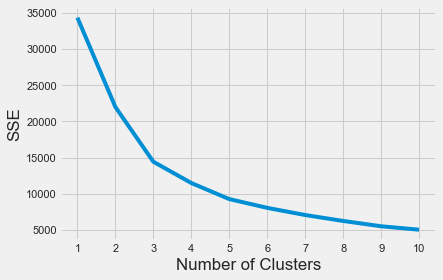

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

We can see that the first major change in the line happens at 3 clusters, while next at 5 clusters.

3 Does not seem as a big enough number, so we'll proceed with 5 instead.

In [ ]:
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)

In [ ]:
kmeans.fit(df)

KMeans(init='random', n_clusters=5, random_state=42)

In [ ]:
color = kmeans.predict(df)

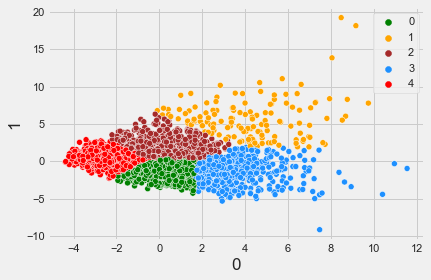

In [ ]:
sns.scatterplot(x=0, y=1, data=df, hue=color, palette=['green','orange','brown','dodgerblue','red'])

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
pca_inv = pcan.inverse_transform(centers)

In [ ]:
centers = scaler.inverse_transform(pca_inv)

In [ ]:
centers = pd.DataFrame(centers, columns=labels[1:])

In [ ]:
centers

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
0,0.575030,0.380668,0.643852,0.002733,4.769521,0.156724,66.147388,37.417181,0.831379,0.392664,...,0.027981,0.036757,0.116185,0.656908,0.000778,0.034871,0.609708,0.029015,0.060710,0.264918
1,0.715526,0.485140,0.305685,0.007950,4.927906,0.547375,32.920196,32.676578,6.952252,5.634669,...,-0.016833,0.036171,0.087182,0.683366,-0.001047,0.076914,0.420426,-0.004251,0.048753,0.459205
2,0.637855,0.402912,0.444223,0.004298,4.720569,0.337989,44.588166,33.997509,2.838132,2.219135,...,0.011795,0.025239,0.091927,0.699892,-0.000358,0.049595,0.490435,0.014415,0.052911,0.393001
3,0.579894,0.430009,0.722600,0.004348,4.998800,0.157956,77.517836,39.681737,2.407786,1.541195,...,0.019230,0.057767,0.136273,0.599615,0.001312,0.043943,0.667865,0.027348,0.064878,0.194655
4,0.601403,0.355446,0.491683,0.002306,4.579822,0.242107,47.633741,34.146018,0.642461,0.428467,...,0.026628,0.016027,0.090060,0.718947,-0.000150,0.035296,0.510730,0.023276,0.053974,0.376875


Now, let's decode from dummy variables. To find values we will set 1 for maximum value among possible categories. For EDUCATION we will take the closest value.

In [ ]:
column_int = ['INSURANCE_FLAG', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'EDUCATION', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'max90days',
             'max60days', 'max30days', 'max21days', 'max14days', 'if_zalog', "num_AccountActive180", 'num_AccountActive90', 'num_AccountActive60',
             'numAccountActiveAll', 'numAccountClosed', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan',
             'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

In [ ]:
for col in column_int:
    centers[col] = round(centers[col])

In [ ]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 78 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   INSURANCE_FLAG                                           5 non-null      float64
 1   DTI                                                      5 non-null      float64
 2   FULL_AGE_CHILD_NUMBER                                    5 non-null      float64
 3   DEPENDANT_NUMBER                                         5 non-null      float64
 4   EDUCATION                                                5 non-null      float64
 5   BANKACCOUNT_FLAG                                         5 non-null      float64
 6   Period_at_work                                           5 non-null      float64
 7   age                                                      5 non-null      float64
 8   max90days                         

In [ ]:
catvar = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']

In [ ]:
ib = pd.DataFrame(centers.iloc[:, 34:38]).transpose()
cp = pd.DataFrame(centers.iloc[:, 38:48]).transpose()
se = pd.DataFrame(centers.iloc[:, 48:50]).transpose()
et = pd.DataFrame(centers.iloc[:, 50:59]).transpose()
es = pd.DataFrame(centers.iloc[:, 59:61]).transpose()
ep = pd.DataFrame(centers.iloc[:, 61:66]).transpose()
ef = pd.DataFrame(centers.iloc[:, 66:72]).transpose()
fs = pd.DataFrame(centers.iloc[:, 72:]).transpose()

In [ ]:
vec = [ib, cp, se, et, es, ep, ef, fs]

In [ ]:
for i, val in enumerate(vec):
    vec[i] = (val == val.max())

In [ ]:
for j in range(len(vec)):
    vec[j] = vec[j].transpose()

In [ ]:
for j in range(len(vec)):
    vec[j] = pd.from_dummies(vec[j])

In [ ]:
for i in range(len(vec)):
    vec[i].columns = [catvar[i]]

In [ ]:
for i in range(len(vec)):
    for j in range(5):
        vec[i][catvar[i]][j] = vec[i][catvar[i]][j][len(catvar[i])+1:]

In [ ]:
res = pd.concat(vec, axis = 1)

In [ ]:
res

,INCOME_BASE_TYPE,CREDIT_PURPOSE,SEX,EMPL_TYPE,EMPL_SIZE,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS
0,Форма банка (без печати работодателя),Ремонт,мужской,специалист,>250,Торговля,ООО,женат / замужем
1,2НДФЛ,Ремонт,женский,специалист,>250,Торговля,ООО,холост / не замужем
2,Поступление зарплаты на счет,Ремонт,женский,специалист,>250,Торговля,ООО,женат / замужем
3,Форма банка (без печати работодателя),Ремонт,мужской,менеджер среднего звена,>250,Торговля,ООО,женат / замужем
4,Поступление зарплаты на счет,Ремонт,мужской,специалист,>250,Торговля,ООО,женат / замужем


In [ ]:
c = centers.drop(centers.columns[34:], axis = 1)

In [ ]:
c = pd.concat([c,res], axis = 1)

In [ ]:
c['EDUCATION'] = c['EDUCATION'].replace([5], "Высшее")

In [ ]:
c.transpose()

,0,1,2,3,4
INSURANCE_FLAG,1.0,1.0,1.0,1.0,1.0
DTI,0.380668,0.48514,0.402912,0.430009,0.355446
FULL_AGE_CHILD_NUMBER,1.0,0.0,0.0,1.0,0.0
DEPENDANT_NUMBER,0.0,0.0,0.0,0.0,0.0
EDUCATION,Высшее,Высшее,Высшее,Высшее,Высшее
BANKACCOUNT_FLAG,0.0,1.0,0.0,0.0,0.0
Period_at_work,66.0,33.0,45.0,78.0,48.0
age,37.0,33.0,34.0,40.0,34.0
max90days,1.0,7.0,3.0,2.0,1.0
max60days,0.0,6.0,2.0,2.0,0.0


These are 5 typical images of 5 different types of clients.

## Type 1 - young family guy

Married man with a child, specialist with higher education. Works about 66 days, has several accounts and credits. Pays a significant sum a month for credits. Takes credit for repairs, works in sales as specialist, earns >250. Makes requests to credit bureaus about once half a year (maybe less). Takes credits periodically, has beena client for some time. Has delay in payments.

## Conclusions for type 1

- working man
- high salary with high spending (probably on wife and child)
- probably, due to having large sum to payoff has some delays which is likely to happen again
- high probability that will take one more credit

## Type 2 - careerist girl

Not married woman in early 30s, with higher education. Earns a lot, has several credits and accounts. Pays a moderate sum for credits. Makes requests to credit bureaus very often. Has online account. Has delay in payments.

## Conclusions for type 2

- Woman focusing on working so probably will not lose job
- constantly monitors her finances, meaning signidicant delays are not very likely to happen
- Takes credit for repairment, which will likely make her take more credits
- seems to be spending a lot and making impulsive purchases, so will need more credits.

## Type 3 - Financially stable wife

Married working woman in early 30s, without children. Does not have many accounts/credits but frequently makes requests to credit bureaus. Rarely takes credits, however does not delay payments a lot, Does not have a delay. Earns a lot, however does not pay much for credits due to having less credits.

## Conclusions for type 3

- Stable financial situation - does not take many credits, so not very likely to take one more soon
- however, if family decides to have a baby, then probbaly number of credits will rise
- in comparison to type 2, makes more thoughtful purchases (probably discusses with husband)
- Does not usually delay payments

## Type 4 - well-established family man

Married man in 40s with a child, has many credits, pays a for them and has delays in payments. A long time client, taking credits regularly. Works a lot, makes requests to credit bureaus. Has "zalog"

## Conclusions for type 4

- Has high expenditures and high salary, so likely to take credits and pay them off
- very likely to have delays in payments
- a loyal client, so unlikely to change the firm and likely to stay with us

## Type 5 - wealthy husband

Married man without children, earns a lot. Does not take many credits, does not pay much and does not make delays. Works a moderate amount of time.

## Conclusions for type 5

- Does not need much extra money, so is unlikely to take one more credit soon
- Takes credits for small sums
- Is very unlikely to delay payments
- Possibly with birth of child will increase expenditures and willing to take credits.

We can notice that "Financially stable wife" and "wealthy husband" are quite similar, so the algorithm may have accidentaly divided these classes due to required choice of 5 clusters. These 2 classes have similar aspects, having difference mainly in sex.

Mainly, we can see the clients having similarities:

- make >250
- have insurance
- mainly don't make "zalog"
- have been clients for some time
- have higher education
- don't have dependants

So, the clusters are:

- wealthy husband/Financially stable wife (financially stable married person withput chilren)
- careerist girl
- young family guy
- well-established family man

## Why kmeans

Kmeans is a great clusterization algorithm. It's **positive** aspects are: ability to find some complex dependencies, that can be not sees by human at the first glance; it makes great visualization, divides in clusters so that elements are very close inside cluster and quite far outside clusters; likely to well assess anomalies.

**Drawbacks** are: manual setting of number of clusters, which may not be accurate; need to normalize (very much harmed by scaling), what we actually did

# RFM

## Why RFM

**Positives aspects**: quite easy to interpret acquired data; clearly shows clusters based on selected features.

**Negative aspects**: Bad for forecasting (we don't need it); highly depends on chosen fields.

As we don't need to forecast, one of drawbacks is insufficient. We have tochoose right fields, for what we ewill use some methods. Easy data interpretation is actually very important for out analysis.

## RFM

We need to choose three features: Recency, Frequency and Monetary. To choose them let's build correlation matrix

<ipython-input-104-73a523ad8f94>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_removed.corr())


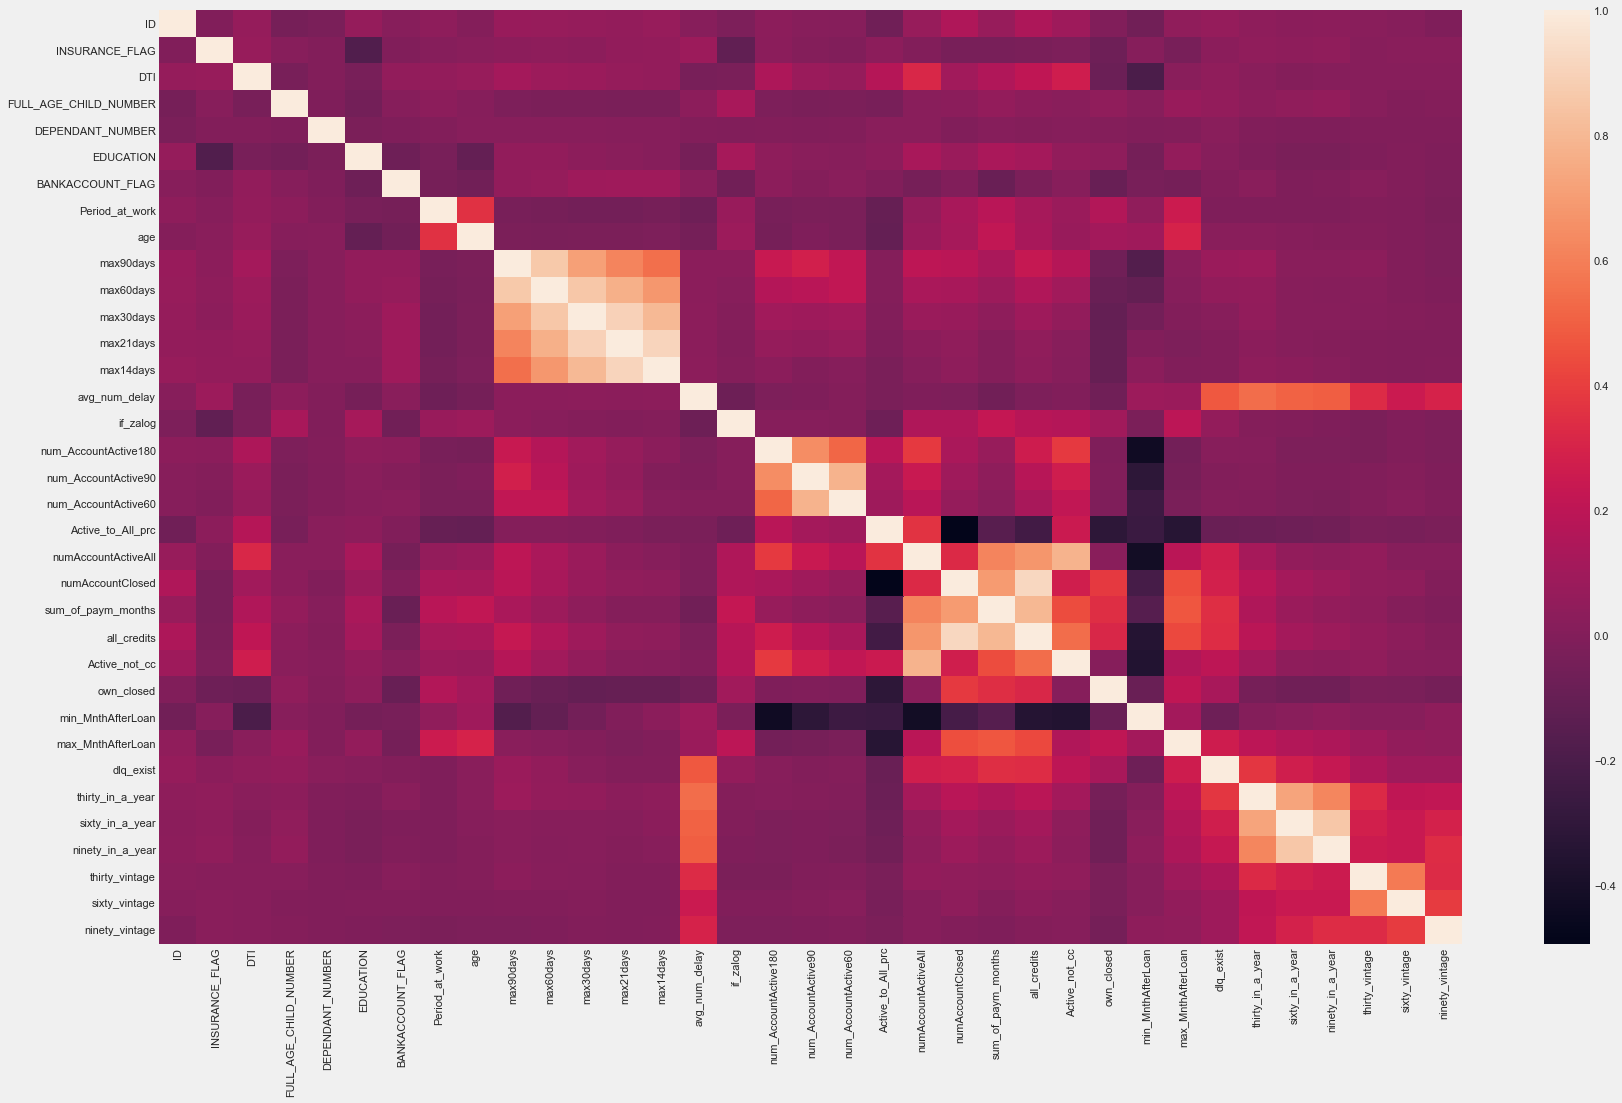

In [ ]:
plt.figure(figsize=(26, 16))
sns.heatmap(data_removed.corr())
plt.show()

We can choose

**Recency** - min_MnthAfterLoan (months since last loan)

**Frequency** - all_credits (total number of credits)

**Monetary** - sum_of_paym_months (total last payment in thousands)

Let's have a look at what values of data are present in these fields.


In [ ]:
rfm = pd.concat([data_encoded_copy['min_MnthAfterLoan'], data_encoded_copy['all_credits'], data_encoded_copy['sum_of_paym_months']], axis = 1)

In [ ]:
stats = pd.concat([rfm.min(), rfm.max(), rfm.mean()], axis=1)

In [ ]:
stats.columns = ['min', 'max', 'mean']

In [ ]:
stats

,min,max,mean
min_MnthAfterLoan,-1.0,109.0,14.119469
all_credits,1.0,29.0,5.719027
sum_of_paym_months,0.0,672.0,80.651825


As we can see, there is quite a big difference in values, so instead of 3 quantiles we will use 5.

We will use number 1-5 to represent each quantile:
    
**R** - min_MnthAfterLoan

1 - most recent clients, the most active ones

2 - less recent clients, still active clients

3 - sleeping clients - havent's used services for some time

4 - long sleeping clients, stopped using services, close to be lost

5 - lost clients

**F** - all_credits

1 - People taking a lot of credits, will take more

2 - take not that many credits, are likely to come back

3 - took a moderate number of credits, may come back

4 - took a small number of credits, but came back

5 - took a very small number of credits

**M** - sum_of_paym_months

1 - spend a lot of money

2 - paid much

3 - paid moderate amount of money

4 - paid not much

5 - barely paid

We are going to have 125 segments. This is too much, so based on individual scores for R, F abd M we will take the average score and then separate them into 5 clusters.

In [ ]:
data_removed = data_removed.sort_values('min_MnthAfterLoan')

In [ ]:
line = [5]*723 + [4]*723 + [3]*724 + [2]*723 + [1]*723

In [ ]:
line.reverse()

In [ ]:
data_removed['R'] = line

In [ ]:
data_removed = data_removed.sort_values('all_credits')

In [ ]:
line.reverse()

In [ ]:
data_removed['F'] = line

In [ ]:
data_removed = data_removed.sort_values('sum_of_paym_months')

In [ ]:
data_removed['M'] = line

In [ ]:
data_removed['RFM'] = (data_removed['R'] + data_removed['M'] + data_removed['F'] )/ 3

In [ ]:
data_removed = data_removed.sort_values('RFM')

In [ ]:
line.reverse()

In [ ]:
data_removed['rank'] = line

In [ ]:
c1 = data_removed[data_removed['rank'] == 1]

In [ ]:
c2 = data_removed[data_removed['rank'] == 2]

In [ ]:
c3 = data_removed[data_removed['rank'] == 3]

In [ ]:
c4 = data_removed[data_removed['rank'] == 4]

In [ ]:
c5 = data_removed[data_removed['rank'] == 5]

So, we derived 5 clusters, let's have a look at them.


## Cluster 1

### Top clients - recent, most money, for long



In [ ]:
c1.mode().loc[0, :]

ID                                                     1000186
INCOME_BASE_TYPE         Форма банка (без печати работодателя)
CREDIT_PURPOSE                                          Ремонт
INSURANCE_FLAG                                             1.0
DTI                                                       0.49
SEX                                                    мужской
FULL_AGE_CHILD_NUMBER                                      0.0
DEPENDANT_NUMBER                                           0.0
EDUCATION                                                  5.0
EMPL_TYPE                                           специалист
EMPL_SIZE                                                 >250
BANKACCOUNT_FLAG                                           0.0
Period_at_work                                             6.0
age                                                       28.0
EMPL_PROPERTY                                         Торговля
EMPL_FORM                                              

In [ ]:
c1.mean(numeric_only=True)

ID                       1.111276e+06
INSURANCE_FLAG           6.141079e-01
DTI                      4.306362e-01
FULL_AGE_CHILD_NUMBER    5.795297e-01
DEPENDANT_NUMBER         1.383126e-03
EDUCATION                4.955740e+00
BANKACCOUNT_FLAG         1.991701e-01
Period_at_work           6.804011e+01
age                      3.738174e+01
max90days                2.482711e+00
max60days                1.564315e+00
max30days                1.023513e+00
max21days                6.818811e-01
max14days                5.366528e-01
avg_num_delay            5.638781e-02
if_zalog                 4.343015e-01
num_AccountActive180     8.395574e-01
num_AccountActive90      3.775934e-01
num_AccountActive60      2.240664e-01
Active_to_All_prc        3.652768e-01
numAccountActiveAll      4.008299e+00
numAccountClosed         7.316736e+00
sum_of_paym_months       1.617967e+02
all_credits              1.132503e+01
Active_not_cc            2.024896e+00
own_closed               1.193638e+00
min_MnthAfte

So, it seems that the most favourable clients are
- married male of about 37 years old
- without children,
- working in Sales
- works about 68 days,
- takes credit for house renovation
- earns more than 250,
- paid about 161 thousand last month
- has on total 11 credits
- last took credit 4,5 months ago
- does not have much delays
- makes request to credit bureaus twice in 90 days

Clients from this cluster should be paid much attention and be kept at all costs as they are most favourable clients for the firm.

## Cluster 2
### Perspective clients - quite recent, much money,  quite long time

In [ ]:
c2.mode().loc[0, :]

ID                                                     1000106
INCOME_BASE_TYPE         Форма банка (без печати работодателя)
CREDIT_PURPOSE                                          Ремонт
INSURANCE_FLAG                                             1.0
DTI                                                       0.59
SEX                                                    женский
FULL_AGE_CHILD_NUMBER                                      0.0
DEPENDANT_NUMBER                                           0.0
EDUCATION                                                  5.0
EMPL_TYPE                                           специалист
EMPL_SIZE                                                 >250
BANKACCOUNT_FLAG                                           0.0
Period_at_work                                            10.0
age                                                       35.0
EMPL_PROPERTY                                         Торговля
EMPL_FORM                                              

In [ ]:
c2.mean(numeric_only=True)

ID                       1.099942e+06
INSURANCE_FLAG           5.518672e-01
DTI                      4.074274e-01
FULL_AGE_CHILD_NUMBER    5.753804e-01
DEPENDANT_NUMBER         1.106501e-02
EDUCATION                4.793914e+00
BANKACCOUNT_FLAG         2.254495e-01
Period_at_work           5.992531e+01
age                      3.659059e+01
max90days                1.726141e+00
max60days                1.164592e+00
max30days                7.800830e-01
max21days                5.670816e-01
max14days                4.508990e-01
avg_num_delay            6.069433e-02
if_zalog                 3.983402e-01
num_AccountActive180     4.107884e-01
num_AccountActive90      1.493776e-01
num_AccountActive60      9.820194e-02
Active_to_All_prc        4.043508e-01
numAccountActiveAll      2.850622e+00
numAccountClosed         4.497925e+00
sum_of_paym_months       1.053001e+02
all_credits              7.348548e+00
Active_not_cc            1.401107e+00
own_closed               9.308437e-01
min_MnthAfte

Typical profile of this cluster's member:

- married woman of 36 years old
- without children
- works in sales
- paid 105 thousand last month
- works about 60 days
- earns more than 250
- takes credit for house renovation
- has about 7 credits in total
- last took credit about 9 months ago
- does not have much delays
- makes request to credit bureaus once in 60 days

Clients from this cluster are very similar to the ones in the first cluster. They should also be cared about and kept in the firm.

## Cluster 3
### Average client


In [ ]:
c3.mode().loc[0, :]

ID                                            1000446
INCOME_BASE_TYPE         Поступление зарплаты на счет
CREDIT_PURPOSE                                 Ремонт
INSURANCE_FLAG                                    1.0
DTI                                              0.49
SEX                                           мужской
FULL_AGE_CHILD_NUMBER                             0.0
DEPENDANT_NUMBER                                  0.0
EDUCATION                                         5.0
EMPL_TYPE                                  специалист
EMPL_SIZE                                        >250
BANKACCOUNT_FLAG                                  0.0
Period_at_work                                    6.0
age                                              29.0
EMPL_PROPERTY                                Торговля
EMPL_FORM                                         ООО
FAMILY_STATUS                         женат / замужем
max90days                                         1.0
max60days                   

In [ ]:
c3.mean(numeric_only=True)

ID                       1.093875e+06
INSURANCE_FLAG           5.787293e-01
DTI                      3.931461e-01
FULL_AGE_CHILD_NUMBER    5.911602e-01
DEPENDANT_NUMBER         1.381215e-03
EDUCATION                4.755525e+00
BANKACCOUNT_FLAG         2.555249e-01
Period_at_work           5.538674e+01
age                      3.609254e+01
max90days                1.599448e+00
max60days                1.103591e+00
max30days                8.190608e-01
max21days                5.856354e-01
max14days                4.461326e-01
avg_num_delay            6.239383e-02
if_zalog                 3.149171e-01
num_AccountActive180     3.549724e-01
num_AccountActive90      1.560773e-01
num_AccountActive60      9.254144e-02
Active_to_All_prc        4.593435e-01
numAccountActiveAll      2.138122e+00
numAccountClosed         2.799724e+00
sum_of_paym_months       7.132182e+01
all_credits              4.937845e+00
Active_not_cc            1.011050e+00
own_closed               6.616022e-01
min_MnthAfte

Typical profile of this cluster's member:

- married man of 36 years old
- without children
- works in sales
- paid 71 thousand last month
- works about 55 days
- earns more than 250
- takes credit for house renovation
- has about 5 credits in total
- last took credit about 12 months ago
- does not have much delays
- makes request to credit bureaus once in 90 days

These clients should be additionally stimulated to take more credits abd become members of first two clusters.

## Cluster 4
### Sleeping client


In [ ]:
c4.mode().loc[0, :]

ID                                            1000026
INCOME_BASE_TYPE         Поступление зарплаты на счет
CREDIT_PURPOSE                                 Ремонт
INSURANCE_FLAG                                    1.0
DTI                                              0.49
SEX                                           мужской
FULL_AGE_CHILD_NUMBER                             0.0
DEPENDANT_NUMBER                                  0.0
EDUCATION                                         5.0
EMPL_TYPE                                  специалист
EMPL_SIZE                                        >250
BANKACCOUNT_FLAG                                  0.0
Period_at_work                                    6.0
age                                              26.0
EMPL_PROPERTY                                Торговля
EMPL_FORM                                         ООО
FAMILY_STATUS                         женат / замужем
max90days                                         0.0
max60days                   

In [ ]:
c4.mean(numeric_only=True)

ID                       1.096235e+06
INSURANCE_FLAG           5.975104e-01
DTI                      3.692531e-01
FULL_AGE_CHILD_NUMBER    5.311203e-01
DEPENDANT_NUMBER         0.000000e+00
EDUCATION                4.604426e+00
BANKACCOUNT_FLAG         2.655602e-01
Period_at_work           4.936929e+01
age                      3.434163e+01
max90days                1.174014e+00
max60days                8.649051e-01
max30days                6.533489e-01
max21days                4.851188e-01
max14days                3.989043e-01
avg_num_delay            6.769264e-02
if_zalog                 2.655602e-01
num_AccountActive180     2.392808e-01
num_AccountActive90      7.607192e-02
num_AccountActive60      4.564315e-02
Active_to_All_prc        5.047142e-01
numAccountActiveAll      1.419087e+00
numAccountClosed         1.771784e+00
sum_of_paym_months       3.969295e+01
all_credits              3.190871e+00
Active_not_cc            6.749654e-01
own_closed               4.951591e-01
min_MnthAfte

Typical profile of this cluster's member:

- married man of 34 years old
- probably with a child
- works in sales
- paid 40 thousand last month
- works about 50 days
- earns more than 250
- takes credit for house renovation
- has about 3 credits in total
- last took credit about 14 months ago
- does not have much delays
- makes request to credit bureaus once in 90 days

These clients are close to be lost, so we need to attract them and stimulate to take new credits.

## Cluster 4
### Lost client

In [ ]:
c5.mode().loc[0, :]

ID                                            1000006
INCOME_BASE_TYPE         Поступление зарплаты на счет
CREDIT_PURPOSE                                 Ремонт
INSURANCE_FLAG                                    1.0
DTI                                              0.49
SEX                                           мужской
FULL_AGE_CHILD_NUMBER                             0.0
DEPENDANT_NUMBER                                  0.0
EDUCATION                                         5.0
EMPL_TYPE                                  специалист
EMPL_SIZE                                        >250
BANKACCOUNT_FLAG                                  0.0
Period_at_work                                    6.0
age                                              25.0
EMPL_PROPERTY                                Торговля
EMPL_FORM                                         ООО
FAMILY_STATUS                         женат / замужем
max90days                                         0.0
max60days                   

In [ ]:
c5.mean(numeric_only=True)

ID                       1.087208e+06
INSURANCE_FLAG           6.639004e-01
DTI                      3.385477e-01
FULL_AGE_CHILD_NUMBER    5.048409e-01
DEPENDANT_NUMBER         2.766252e-03
EDUCATION                4.583679e+00
BANKACCOUNT_FLAG         2.185339e-01
Period_at_work           5.016044e+01
age                      3.498479e+01
max90days                1.038180e+00
max60days                8.466235e-01
max30days                6.760587e-01
max21days                5.817155e-01
max14days                5.137888e-01
avg_num_delay            6.735391e-02
if_zalog                 2.199170e-01
num_AccountActive180     2.766252e-03
num_AccountActive90      0.000000e+00
num_AccountActive60      0.000000e+00
Active_to_All_prc        4.070770e-01
numAccountActiveAll      6.929461e-01
numAccountClosed         1.100968e+00
sum_of_paym_months       2.516044e+01
all_credits              1.793914e+00
Active_not_cc            3.084371e-01
own_closed               3.540802e-01
min_MnthAfte

Typical profile of this cluster's member:

- married man of 35 years old
- probably with a child
- works in sales
- paid 25 thousand last month
- works about 50 days
- earns more than 250
- takes credit for house renovation
- has about 1-2 credits in total
- last took credit about 30 months ago
- does not have much delays
- makes request to credit bureaus once in 90 days

This client should be tried to be brought back, however, resources should not be spent a lot on it. They may be not lost as they took credit more than once but still they did not come back later.

### Conclusion for RFM

Company should
- keep 1 and 2 cluster clients (by e.g. making some privelege programs)
- promote 3rd cluster clients (by e.g. making some special offers and advertising privelege programs)
- Try to awake 4 and 5 cluster clients (by e.g. making special offers)

## Conclusion

K-means and RFM generally brought us different results. which one is better is a field for future analysis. RFM missed carrierist girls so probably it should be added.

In general, some fields are the same across clusters. It seems that most clients work in sales, have salary of >250 and higher education.